Dataset Imported From: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/code?datasetId=134715

In [28]:
#Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt



# Reading the data

In [10]:
#read the dataset and store it in a variable df
df = pd.read_csv("IMDB Dataset.csv")


#print top 5 rows
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Inspecting the data

In [11]:
#print the shape of dataframe
df.shape

(50000, 2)

In [12]:
# summary of dataset
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [13]:
# checkfor null values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

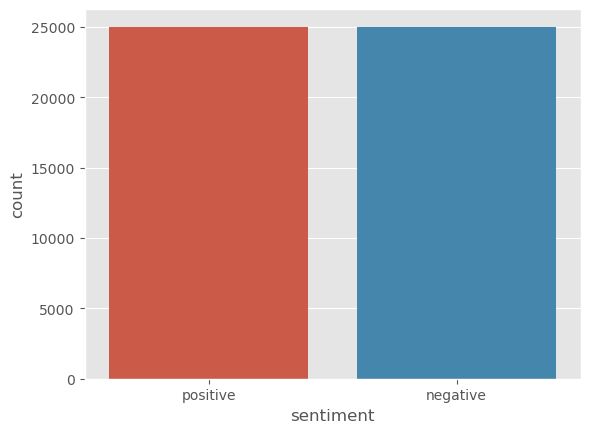

In [14]:
# plot the value count of each sentiment
plt.style.use("ggplot")
sns.countplot(data = df, x = df["sentiment"])
plt.show()

The dataset is balanced

It is difficult for the maching to process the sentiment as a word, therefore, we need to map the sentiments as 0 and 1, in order to allow the model to work on it easily

In [15]:
#create a new column "Category" which represent 1 if the sentiment is positive or 0 if it is negative

df["Category"] = df["sentiment"].apply(lambda x: 1 if x=="positive" else 0)

# Data Cleaning

The review has several punctuations, stop words (words used in a sentence such as articles,prepositions which do not depict emotions but are mainly included for grammar and readability)

Note: There maybe other isuues to such as emoticons or tags, but for now I am focussing on punctuations and stop words

In [16]:
# Create a function to remove the stop words and punctiations
"""" We will also lemmatise the text, which means, the words left in the review will be reduced to their basic form in order to
    avoid several variations of the same word, which might affect the model"""


import spacy


# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm") 

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

In [17]:
# create a new column "preprocessed_comment" and use the utility function above to get the clean data

df["preprocessed_comment"] = df["review"].apply(preprocess)

In [18]:
# the preprocessed DataFrame
df.head()

,review,sentiment,Category,preprocessed_comment
0,One of the other reviewers has mentioned that ...,positive,1,reviewer mention watch 1 oz episode hook right...
1,A wonderful little production. <br /><br />The...,positive,1,wonderful little production < br /><br />the f...
2,I thought this was a wonderful way to spend ti...,positive,1,think wonderful way spend time hot summer week...
3,Basically there's a family where a little boy ...,negative,0,basically family little boy Jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,Petter Mattei love Time money visually stunnin...


In [19]:
# sample preprocessed comment
df.preprocessed_comment[0]

'reviewer mention watch 1 oz episode hook right exactly happen me.<br /><br />the thing strike Oz brutality unflinche scene violence set right word trust faint hearted timid pull punch regard drug sex violence hardcore classic use word.<br /><br />it call OZ nickname give Oswald Maximum Security State Penitentary focus mainly Emerald City experimental section prison cell glass front face inward privacy high agenda Em City home aryan Muslims gangsta Latinos Christians Italians irish scuffle death stare dodgy dealing shady agreement far away.<br /><br />i main appeal fact go show dare forget pretty picture paint mainstream audience forget charm forget romance oz mess episode see strike nasty surreal ready watch develop taste Oz get accustomed high level graphic violence violence injustice crooked guard sell nickel inmate kill order away mannered middle class inmate turn prison bitch lack street skill prison experience watch Oz comfortable uncomfortable viewing that touch dark'

As seen above, there are still html tags in the review.
Let's create a function to clean the tag and clean the data further

In [20]:
# function to remove html tags
def remove_html(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)

In [21]:
# apply the function to the column "preprocessed_comments" to further clean the sata
df["preprocessed_comment"] = df["preprocessed_comment"].apply(remove_html)

In [22]:
# clean data sample
df.preprocessed_comment[1]

'wonderful little production the film technique unassuming- old time BBC fashion give comforting discomforting sense realism entire piece The actor extremely chosen- Michael Sheen get polari voice pat truly seamless editing guide reference Williams diary entry worth watching terrificly write perform piece masterful production great master comedy life The realism come home little thing fantasy guard use traditional dream technique remain solid disappear play knowledge sense particularly scene concern Orton Halliwell set particularly flat Halliwell mural decorate surface terribly'

# Split the data

In [23]:
#split the data into train and test data to test teh efficiency of the model
X_train, X_test, y_train, y_test = train_test_split(df.preprocessed_comment, df.Category, test_size = 0.2, random_state = 2022)


# Model

In [24]:
# in order to convert the text into vector for (for the ease of analysis), TfidfVectorizer is inluded in the pipeline



clf = Pipeline([
    ("Tfidvectorizer", TfidfVectorizer()),
    ("rfc", (RandomForestClassifier(n_estimators=50, criterion='entropy')))
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      5043
           1       0.85      0.84      0.85      4957

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



The fi-score, which is the harmonic mean of recall and precision, is 0.85.
Let's see what the confusion matrix has to tell us about true and false positives and negatives

Text(95.72222222222221, 0.5, 'Truth')

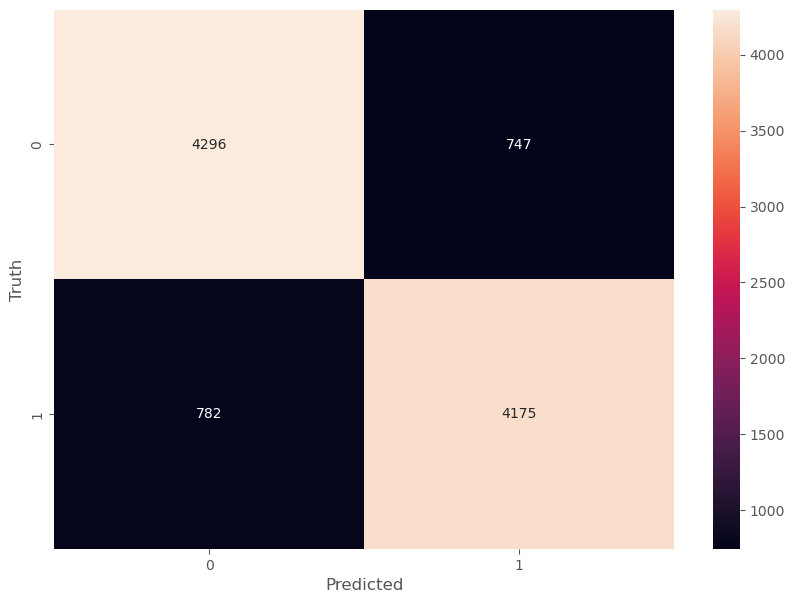

In [25]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Explanation for confusion matrix

Every prediction can be classified as:
1) True positive (correctly predicted as positive - was positive and identified as positive by the model)
2) False positive (incorrectly predicted as positive - was negetive but identified as positive by the model)
3) True negative (correctly predicted as negative - was negative and identified as negative by the model)
4) False negative (incorrectly predicted as negative - was positive but identified as negative by the model)

The tiles in light color are True Postive (4272) and True Negative (4120) - These were predicted correct
The tiles in black are False Negative (771) and False Positive (837) - These were incorrectly predicted


Another popular classifier for text data is Multinomial Naive Bayes classifier. Using it to model the data

In [26]:
#1. create a pipeline object
clf = Pipeline([
    ("Tfidvectorizer", TfidfVectorizer()),
    ("NB",  MultinomialNB(alpha = 0.75))
])



#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      5043
           1       0.87      0.86      0.86      4957

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



 From the f1-score, it is clear that this model performs better.
 Although the accuracy has increased but 0.02%, for a large dataset this can mean a huge difference

Text(95.72222222222221, 0.5, 'Truth')

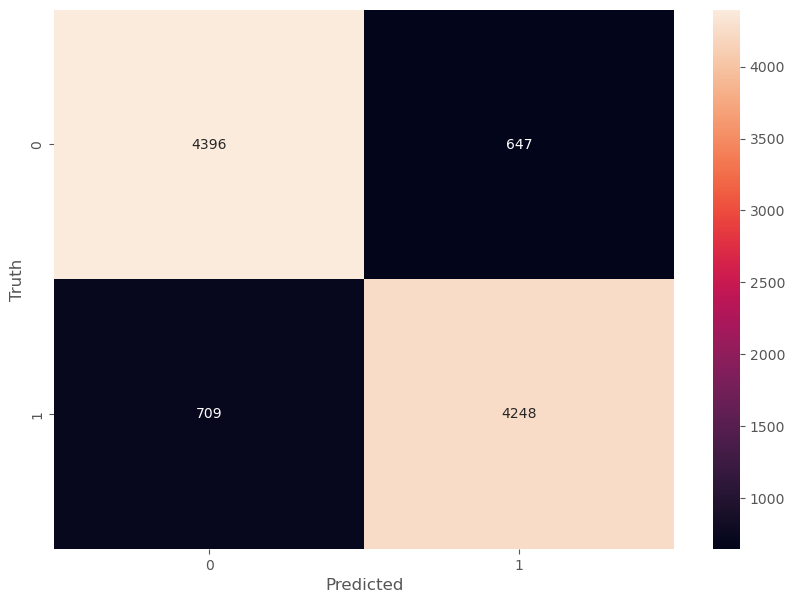

In [27]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

The confision matrix reveals an increase in True Positive and True Negative and a decrease in False Positive and False Negative

# Future reccomendation

1) As I did not find any emoticon in the sample reviews that I checked, I did not apply the code for it. This can be done during the cleaning process.

2) The model can be tuned - hyperparameter tuning of MultinomialNB model